###  This notebook comprises of a series of visuals I created for the 'Figuring Out xG' posts on my blog       

In [1]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen
import matplotlib.patheffects as pe
from highlight_text import fig_text
from adjustText import adjust_text
from tabulate import tabulate
import matplotlib.style as style
import unicodedata
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

from PIL import Image
import urllib
import os
import math

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
def generate_league_data(x):
    url = x
    page = urlopen(url).read()
    soup = BeautifulSoup(page)
    count = 0 
    table = soup.find("tbody")

    pre_df = dict()
    features_wanted =  {"team" , "games","wins","draws","losses", "goals_for","goals_against", "points", "xg_for","xg_against","xg_diff","attendance","xg_diff_per90", "last_5"} #add more features here!!
    rows = table.find_all('tr')
    for row in rows:
        for f in features_wanted:
            if (row.find('th', {"scope":"row"}) != None) & (row.find("td",{"data-stat": f}) != None):
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if f in pre_df:
                    pre_df[f].append(text)
                else:
                    pre_df[f]=[text]
                
    df = pd.DataFrame.from_dict(pre_df)
    df["games"] = pd.to_numeric(df["games"])
    df["xg_diff_per90"] = pd.to_numeric(df["xg_diff_per90"])
    df["minutes_played"] = df["games"] *90
    return(df)

In [3]:
df = generate_league_data("https://fbref.com/en/comps/9/Premier-League-Stats")

In [4]:
df['xg_diff'] = pd. to_numeric(df['xg_diff'])
data = df[["team","xg_diff","xg_for","xg_against"]]
data = data.sort_values(by="xg_diff").reset_index(drop=True)
data

,team,xg_diff,xg_for,xg_against
0,Sheffield Utd,-23.4,18.7,42.1
1,Luton Town,-19.5,20.2,39.6
2,Burnley,-16.9,18.6,35.4
3,Fulham,-11.3,25.2,36.5
4,West Ham,-7.8,29.9,37.7
5,Nott'ham Forest,-6.9,25.0,31.9
6,Crystal Palace,-6.7,24.9,31.6
7,Wolves,-6.3,27.7,34.1
8,Bournemouth,-4.5,28.4,32.9
9,Manchester Utd,-3.8,29.9,33.7


In [5]:
fm_ids = pd.read_csv("CSVs/fotmob_epl_team_ids.csv")
fm_ids = fm_ids[["team", "team_id"]]

data = data.merge(fm_ids, on='team', how='left')
data

,team,xg_diff,xg_for,xg_against,team_id
0,Sheffield Utd,-23.4,18.7,42.1,8657
1,Luton Town,-19.5,20.2,39.6,8346
2,Burnley,-16.9,18.6,35.4,8191
3,Fulham,-11.3,25.2,36.5,9879
4,West Ham,-7.8,29.9,37.7,8654
5,Nott'ham Forest,-6.9,25.0,31.9,10203
6,Crystal Palace,-6.7,24.9,31.6,9826
7,Wolves,-6.3,27.7,34.1,8602
8,Bournemouth,-4.5,28.4,32.9,8678
9,Manchester Utd,-3.8,29.9,33.7,10260


In [6]:
teams_to_replace = {'Sheffield Utd': 8657, 'Burnley': 8191, 'Luton Town': 8346}
for team, team_id in teams_to_replace.items():
    data.loc[data['team'] == team, 'team_id'] = team_id

In [7]:
data['team_id'] = data['team_id'].astype(int)

In [8]:
data.to_csv("CSVs/fotmob_epl_team_ids.csv")

In [9]:
style.use('fivethirtyeight')

In [10]:
gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]
soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

In [11]:
def add_logo_on_ax(ax, team_id, bw = False):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id}.png"))
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


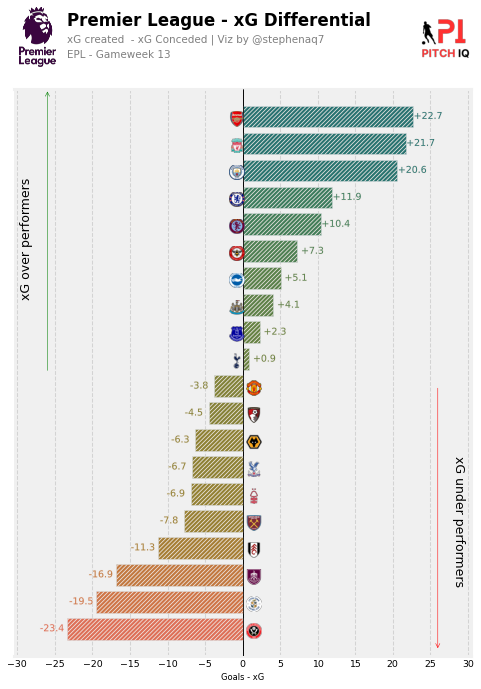

In [12]:
from PIL import Image
import matplotlib.image as image

# style.use('fivethirtyeight')
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(data['xg_diff'].min()), data['xg_diff'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.3)

ax.tick_params(axis='x', labelsize=9)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, data.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xlabel('Goals - xG', size=8)
# -- Bar Chart -------------------------------------
ax.barh(
    data.index, data['xg_diff'],
    hatch='//////', ec='#efe9e6',
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
norm = mcolors.Normalize(vmin=data['xg_diff'].min(),vmax=data['xg_diff'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    data.index, data['xg_diff'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(data['xg_diff'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

for index, x in enumerate(data['xg_diff']):
    if x < 0:
        sign_offset = -1.8
        offset_logo = 0.25
        sign_text = ''
    else:
        sign_offset = 1.8
        offset_logo = 1
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*8,0),
        text=f'{sign_text}{x:.1f}',
        weight='normal',
        ha='center',
        va='center',
        color= cmap(norm(x)),
        size=9,
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=1, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    team_id = data['team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id, False)
    # print(x)

# -- Figure title and arrows --------------------------------
position_negative = data[data['xg_diff'] < 0].index.max()
position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))
ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='green')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='red')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2
ax.annotate(
    xy=(position_x_negative,mid_point_positive),
    text='xG over performers',
    rotation=90,
    xytext=(-20,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)
ax.annotate(
    xy=(position_x_positive,mid_point_negative),
    text='xG under performers',
    rotation=-90,
    xytext=(20,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)

fig_text(
    x = 0.18, y = .96, 
    s = 'Premier League - xG Differential',
    va = 'bottom', ha = 'left',
    fontsize = 16, color = 'black', font='Karla', weight = 'bold'
)

fig_text(
    x = 0.18, y = 0.94, 
    s = 'xG created  - xG Conceded | Viz by @stephenaq7',
    va = 'bottom', ha = 'left',
    fontsize = 10, font='Karla', color = 'gray'
)

fig_text(
    x = 0.18, y = 0.92, 
    s = 'EPL - Gameweek 13',
    va = 'bottom', ha = 'left',
    fontsize = 10, font='Karla', color = 'gray'
)



ax2 = fig.add_axes([0.09, 0.075, 0.07, 1.75])
ax2.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
ax2.imshow(img)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.85, 0.075, 0.1, 1.75])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)


plt.savefig(
    "outputs/epl_08242022.png",
    dpi = 600,
    facecolor = "#EFE9E6",
    edgecolor="none"
)

plt.savefig(
    "outputs/epl_08242022_tr.png",
    dpi = 600,
    facecolor = "none",
    edgecolor="none"
)


In [13]:
team_id_list = team_id
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id}.png")).convert('LA')

In [14]:
def p90_Calculator(variable_value, minutes_played):
    
    variable_value = pd.to_numeric(variable_value)
    
    ninety_minute_periods = minutes_played/90
    
    p90_value = variable_value/ninety_minute_periods
    
    return p90_value

def form_ppg_calc(variable_value):
    wins = variable_value.count("W")
    draws = variable_value.count("D")
    losses = variable_value.count("L")
    points = (wins*3) + (draws)
    # ppg = points/3
    ppg = points/5
    return ppg

In [15]:
df['xG_p90'] = df.apply(lambda x: p90_Calculator(x['xg_for'], x['minutes_played']), axis=1)
df['xGA_p90'] = df.apply(lambda x: p90_Calculator(x['xg_against'], x['minutes_played']), axis=1)
df['ppg_form'] = df.apply(lambda x: form_ppg_calc(x['last_5']), axis=1)

In [16]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [17]:
fm_ids = pd.read_csv("CSVs/fotmob_epl_team_ids.csv")
fm_ids = fm_ids[["team", "team_id"]]

df = df.merge(fm_ids, on='team', how='left')
clubs = list(df.team_id.unique())

findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


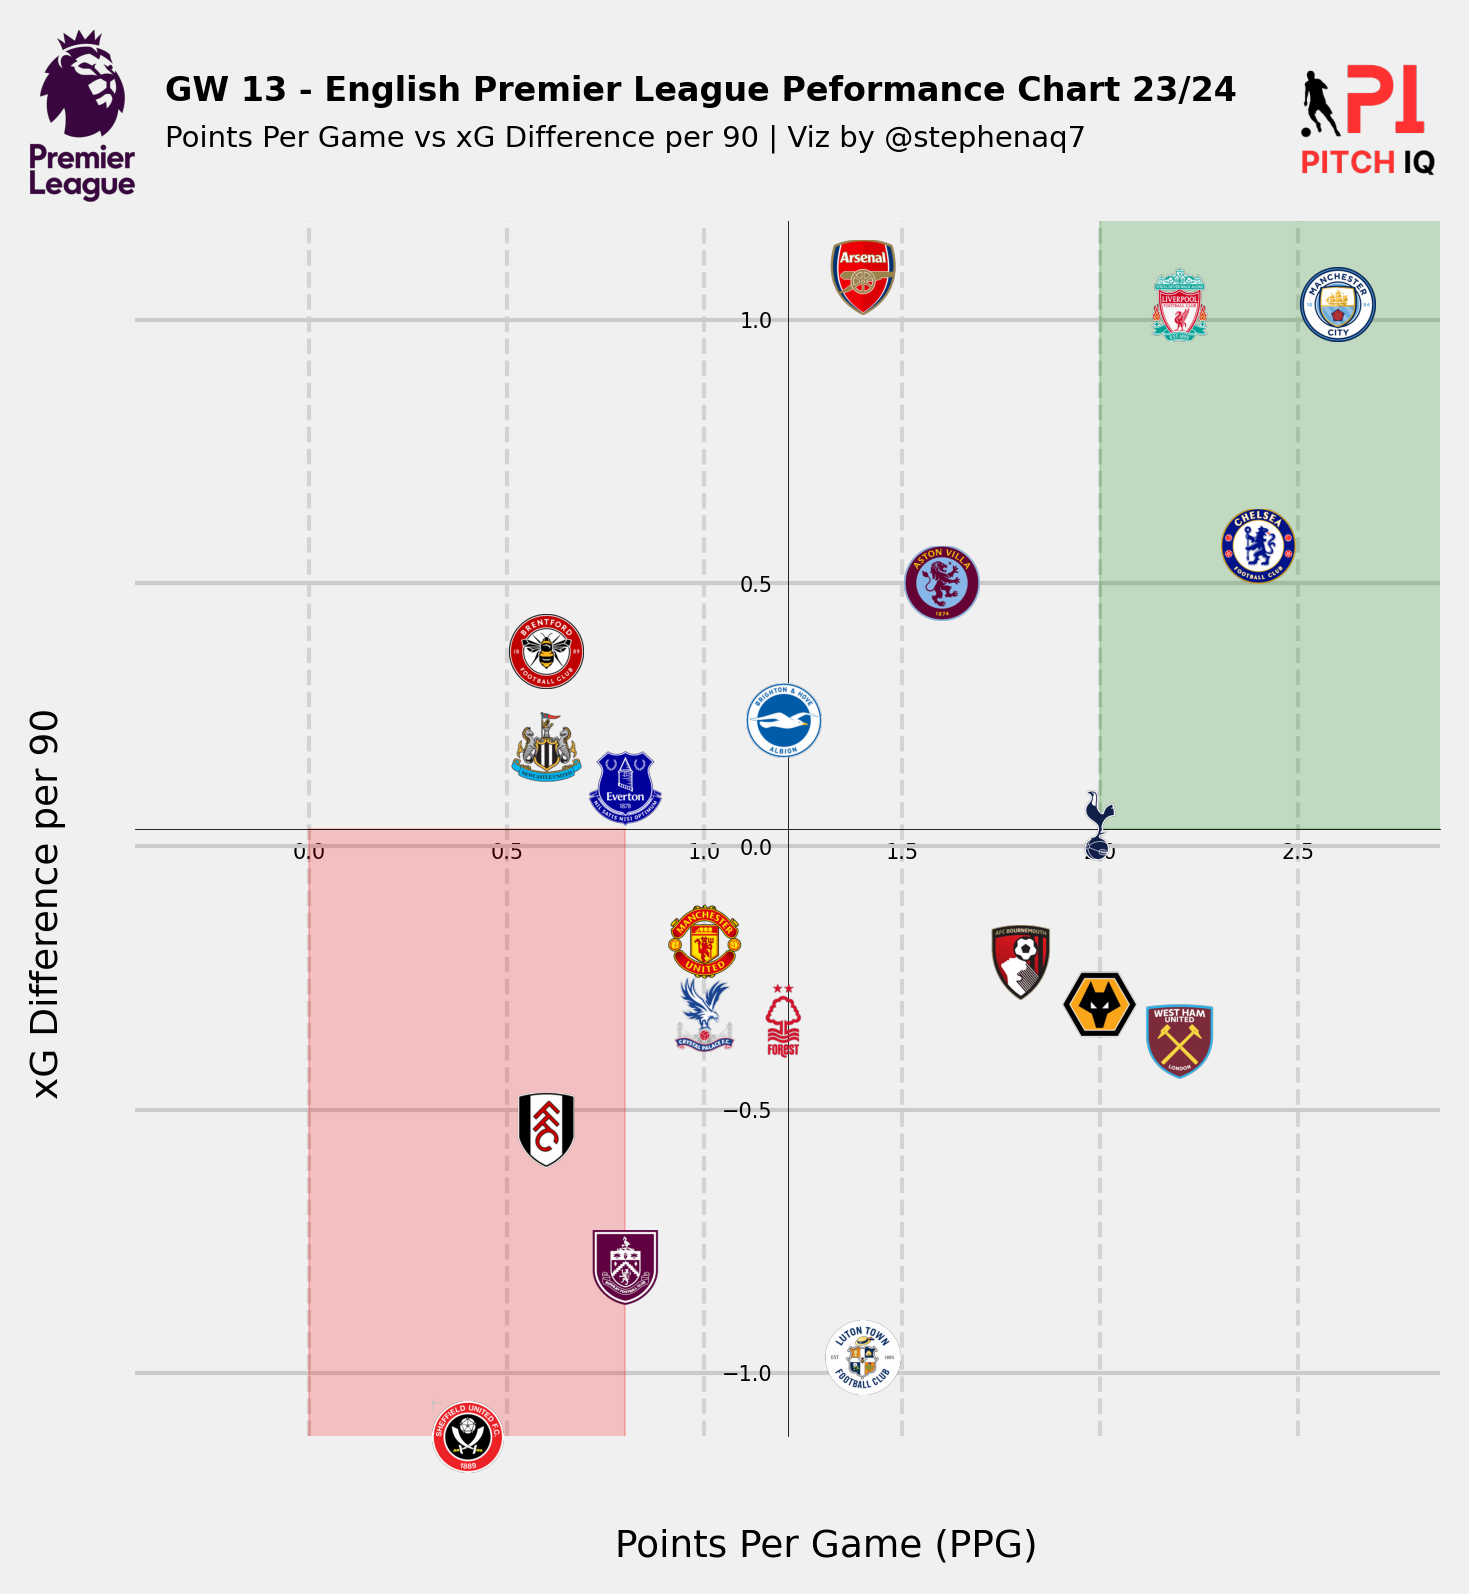

In [18]:
style.use('fivethirtyeight')
x_loc = df["ppg_form"]
y_loc = df['xg_diff_per90']

bgcol = '#fafafa'

fig = plt.figure(figsize=(5,5), dpi=300)
ax = plt.subplot()


ax.set_xlim(x_loc.min()*-1.1,x_loc.max()*1.1)
ax.set_ylim(y_loc.min(),y_loc.max()*1.1)

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

ax_size = 0.05

counter = 0
for x,y in zip(x_loc, y_loc):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size, ax_size],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)

    counter += 1

# Change ticks
ax.tick_params(axis='both', which='major', labelsize=5)


plt.grid(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')

ax.spines['left'].set_position('center')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('black')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.2)

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


# Add average lines
plt.hlines(df['xg_diff_per90'].mean(), 0, 3, color='#c2c1c0')
plt.vlines(df['ppg_form'].mean(), df['xg_diff_per90'].min(), df['xg_diff_per90'].max(), color='#c2c1c0')
ax.axvspan(2.0, 3.3, ymin=0.5, ymax=1.5, alpha=0.2, color='green',label= "Title's on")

ax.axvspan(0.0, 0.8, alpha=0.2, ymin=0.5, ymax=-0.5,color='red',label= "Oh Dear")


## Title & comment
fig.text(.1,.93,'Points Per Game vs xG Difference per 90 | Viz by @stephenaq7',size=7, font='Karla')
fig.text(.1,.96,'GW 13 - English Premier League Peformance Chart 23/24',size=8, font='Karla', weight = 'bold')

## Avg line explanation
fig.text(0.01,0.3,'xG Difference per 90', size=9, color='k',rotation=90)
fig.text(.4,-0.01,'Points Per Game (PPG)', size=9, color='k')


ax2 = fig.add_axes([0.01, 0.075, 0.07, 1.75])
ax2.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
ax2.imshow(img)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.85, 0.075, 0.1, 1.75])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)


## Save plot
plt.savefig('xGChart.png', dpi=1200)



In [19]:

df['goals_for'] = pd.to_numeric(df["goals_for"])
df['xg_for']= pd.to_numeric(df["xg_for"])

df['diff'] = df['goals_for'] - df['xg_for']
df

,games,xg_diff_per90,losses,goals_for,goals_against,wins,last_5,team,points,xg_against,xg_for,xg_diff,minutes_played,xG_p90,xGA_p90,ppg_form,team_id,diff
0,21,1.03,1,47,18,14,D D W W W,Liverpool,48,24.0,45.7,21.7,1890,2.176190,1.142857,2.2,8650,1.3
1,20,1.03,3,48,23,13,W D W W W,Manchester City,43,19.1,39.7,20.6,1800,1.985000,0.955000,2.6,8456,8.3
2,21,1.08,4,42,20,13,W D L L W,Arsenal,43,16.7,39.4,22.7,1890,1.876190,0.795238,1.4,9825,2.6
3,21,0.50,4,43,27,13,W D L W D,Aston Villa,43,26.7,37.2,10.4,1890,1.771429,1.271429,1.6,10252,5.8
4,21,0.04,5,44,31,12,W W L W D,Tottenham,40,35.5,36.4,0.9,1890,1.733333,1.690476,2.0,8586,7.6
5,21,-0.37,6,35,32,10,W W W D D,West Ham,35,37.7,29.9,-7.8,1890,1.423810,1.795238,2.2,8654,5.1
6,21,0.24,5,38,33,8,L D W D D,Brighton,32,30.7,35.9,5.1,1890,1.709524,1.461905,1.2,10204,2.1
7,21,-0.18,9,24,29,10,D L W L D,Manchester Utd,32,33.7,29.9,-3.8,1890,1.423810,1.604762,1.0,10260,-5.9
8,21,0.57,8,35,31,9,W L W W W,Chelsea,31,29.7,41.6,11.9,1890,1.980952,1.414286,2.4,8455,-6.6
9,21,0.19,10,41,32,9,W L L L L,Newcastle Utd,29,36.5,40.5,4.1,1890,1.928571,1.738095,0.6,10261,0.5


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np

findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


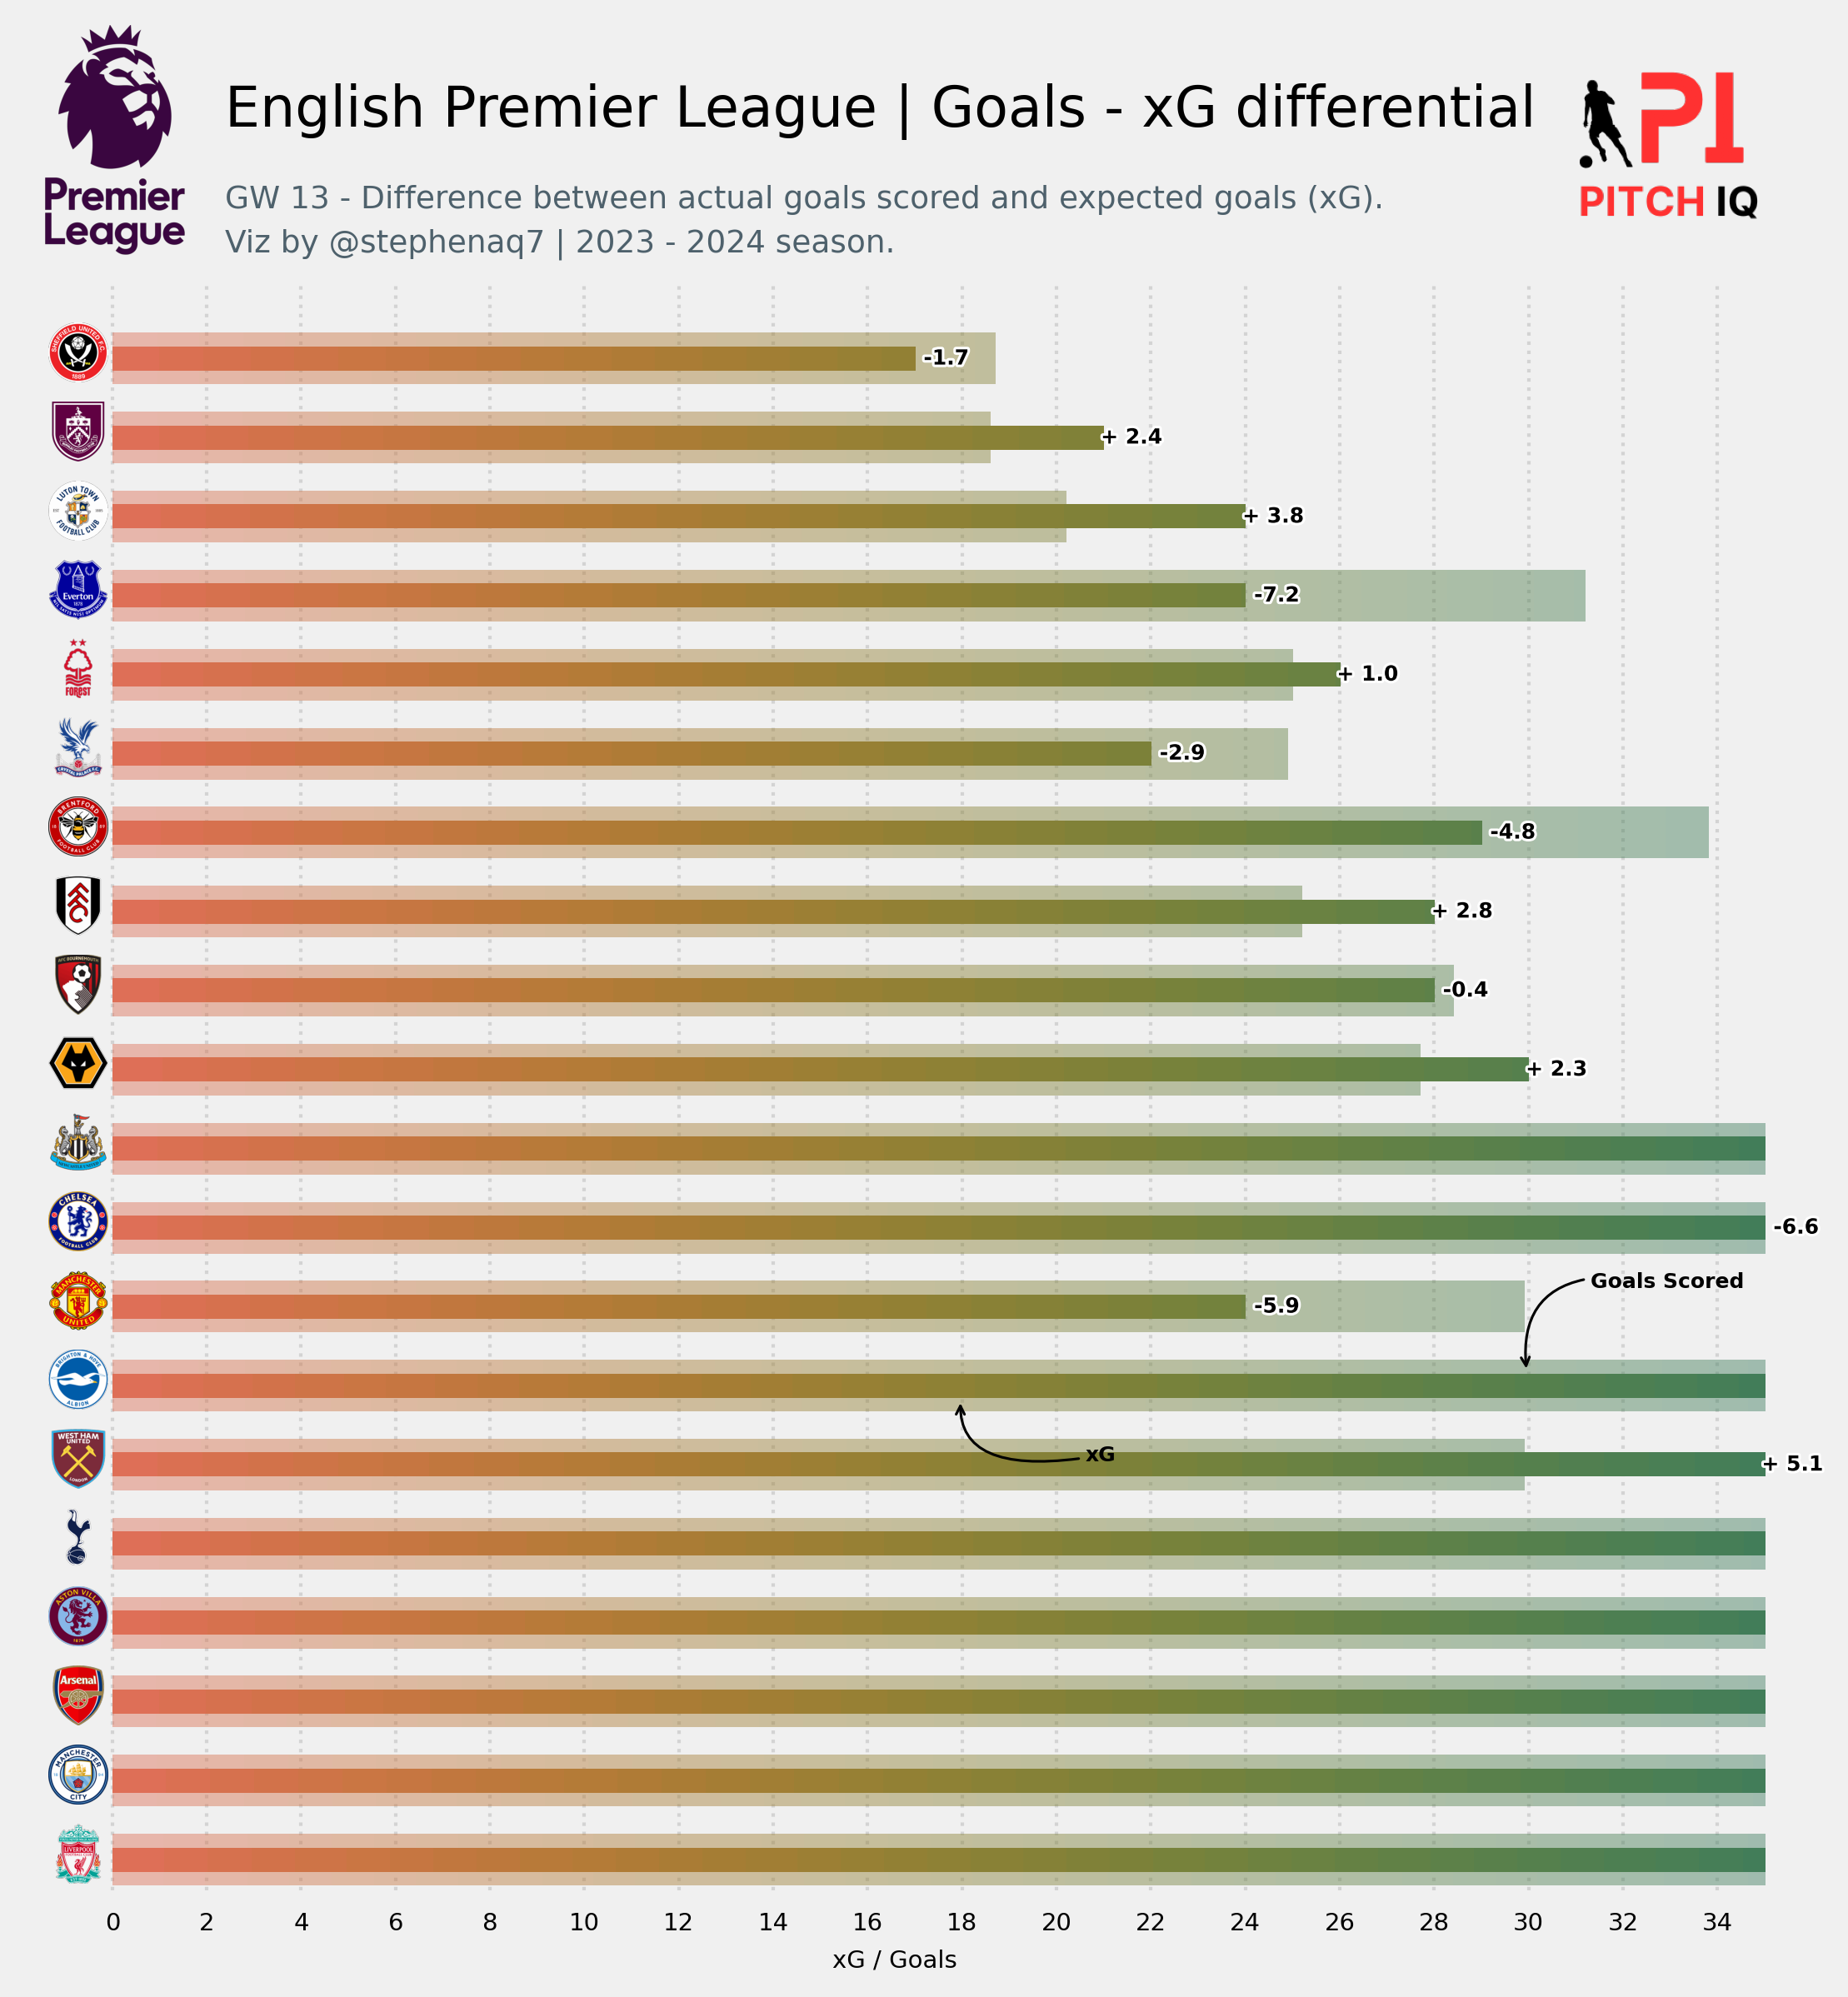

In [21]:
fig = plt.figure(figsize=(8, 8), dpi=300)
ax = plt.subplot(111)

ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_label_text('xG / Goals', size=7)
ax.tick_params(labelsize=7)
ax.grid(axis='x', color='lightgrey', ls=':')

# xG
bars_ = ax.barh(df.index, df['xg_for'], height=0.65)
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x, y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0, 1 * w / max(df['xg_for']), 256))
    ax.imshow(
        grad, extent=[x, x + w, y, y + h],
        aspect='auto', zorder=3,
        norm=NoNorm(vmin=0, vmax=1), cmap='SOC', alpha=0.45
    )

# xGOT
bars_ = ax.barh(df.index, df['goals_for'], height=0.3)
lim = ax.get_xlim() + ax.get_ylim()
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x, y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0, 1 * w / max(df['goals_for']), 256))
    ax.imshow(
        grad, extent=[x, x + w, y, y + h],
        aspect='auto', zorder=3,
        norm=NoNorm(vmin=0, vmax=1), cmap='SOC'
    )

ax.set_xlim(-1.85, 35)  # Adjusted to accommodate 19 bars
ax.set_ylim(-0.5, 20)  # Adjusted to accommodate 19 bars

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for y in df.index:
    ax_coords = DC_to_NFC((-1.35, y - 0.3))  # Adjusted to prevent overlap
    team_id = df['team_id'].iloc[y]
    team = df['team'].iloc[y].replace(' ', '\n')
    diff_xg = df['diff'].iloc[y]
    xGOT = df['goals_for'].iloc[y]
    if diff_xg > 0:
        text_sign = '+'
    else:
        text_sign = ''
    ax_size = 0.03  # Adjusted size to prevent overlap
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    player_face = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id}.png"))
    image_ax.imshow(player_face)
    image_ax.axis('off')
    # ax.annotate(
    #     xy=(-1.1, y - 0.32),
    #     text=team,
    #     size=5,
    #     ha='center',
    #     va='center'
    # )
    text_ = ax.annotate(
        xy=(xGOT, y),
        xytext=(8, 0),
        text=f'{text_sign} {diff_xg:.1f}',
        size=6,
        ha='center',
        va='center',
        textcoords='offset points',
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
    )
text_ = ax.annotate(
    xy=(30, 6),
    xytext=(40,30),
    text='Goals Scored',
    size=6,
    ha='center',
    va='center',
    textcoords='offset points',
    weight='bold',
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="black", linewidth=0.75,
            connectionstyle="angle3,angleA=-10,angleB=100"
    )
)

text_ = ax.annotate(
    xy=(18, 6),
    xytext=(40,-20),
    text='xG',
    size=6,
    ha='center',
    va='center',
    textcoords='offset points',
    weight='bold',
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="black", linewidth=0.75,
            connectionstyle="angle3,angleA=10,angleB=-100"
    )
)

fig_text(
    x=0.18, y=0.95,
    s="English Premier League | Goals - xG differential",
    va='bottom', ha='left',
    fontsize=16, color='black', font='Karla', 
)
fig_text(
    x=0.18, y=0.89,
    s="GW 13 - Difference between actual goals scored and expected goals (xG).\nViz by @stephenaq7 | 2023 - 2024 season.",
    va='bottom', ha='left',
    fontsize=9, color='#4E616C', font='Karla'
)

ax2 = fig.add_axes([0.09, 0.075, 0.07, 1.75])
ax2.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
ax2.imshow(img)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.85, 0.075, 0.1, 1.75])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)


plt.show()  # Added this line to display the plot


In [22]:
df['goals_against'] = pd.to_numeric(df["goals_against"])
df['xg_against']= pd.to_numeric(df["xg_against"])

df['diff_conc'] = df['goals_against'] - df['xg_against']
df

,games,xg_diff_per90,losses,goals_for,goals_against,wins,last_5,team,points,xg_against,xg_for,xg_diff,minutes_played,xG_p90,xGA_p90,ppg_form,team_id,diff,diff_conc
0,21,1.03,1,47,18,14,D D W W W,Liverpool,48,24.0,45.7,21.7,1890,2.176190,1.142857,2.2,8650,1.3,-6.0
1,20,1.03,3,48,23,13,W D W W W,Manchester City,43,19.1,39.7,20.6,1800,1.985000,0.955000,2.6,8456,8.3,3.9
2,21,1.08,4,42,20,13,W D L L W,Arsenal,43,16.7,39.4,22.7,1890,1.876190,0.795238,1.4,9825,2.6,3.3
3,21,0.50,4,43,27,13,W D L W D,Aston Villa,43,26.7,37.2,10.4,1890,1.771429,1.271429,1.6,10252,5.8,0.3
4,21,0.04,5,44,31,12,W W L W D,Tottenham,40,35.5,36.4,0.9,1890,1.733333,1.690476,2.0,8586,7.6,-4.5
5,21,-0.37,6,35,32,10,W W W D D,West Ham,35,37.7,29.9,-7.8,1890,1.423810,1.795238,2.2,8654,5.1,-5.7
6,21,0.24,5,38,33,8,L D W D D,Brighton,32,30.7,35.9,5.1,1890,1.709524,1.461905,1.2,10204,2.1,2.3
7,21,-0.18,9,24,29,10,D L W L D,Manchester Utd,32,33.7,29.9,-3.8,1890,1.423810,1.604762,1.0,10260,-5.9,-4.7
8,21,0.57,8,35,31,9,W L W W W,Chelsea,31,29.7,41.6,11.9,1890,1.980952,1.414286,2.4,8455,-6.6,1.3
9,21,0.19,10,41,32,9,W L L L L,Newcastle Utd,29,36.5,40.5,4.1,1890,1.928571,1.738095,0.6,10261,0.5,-4.5


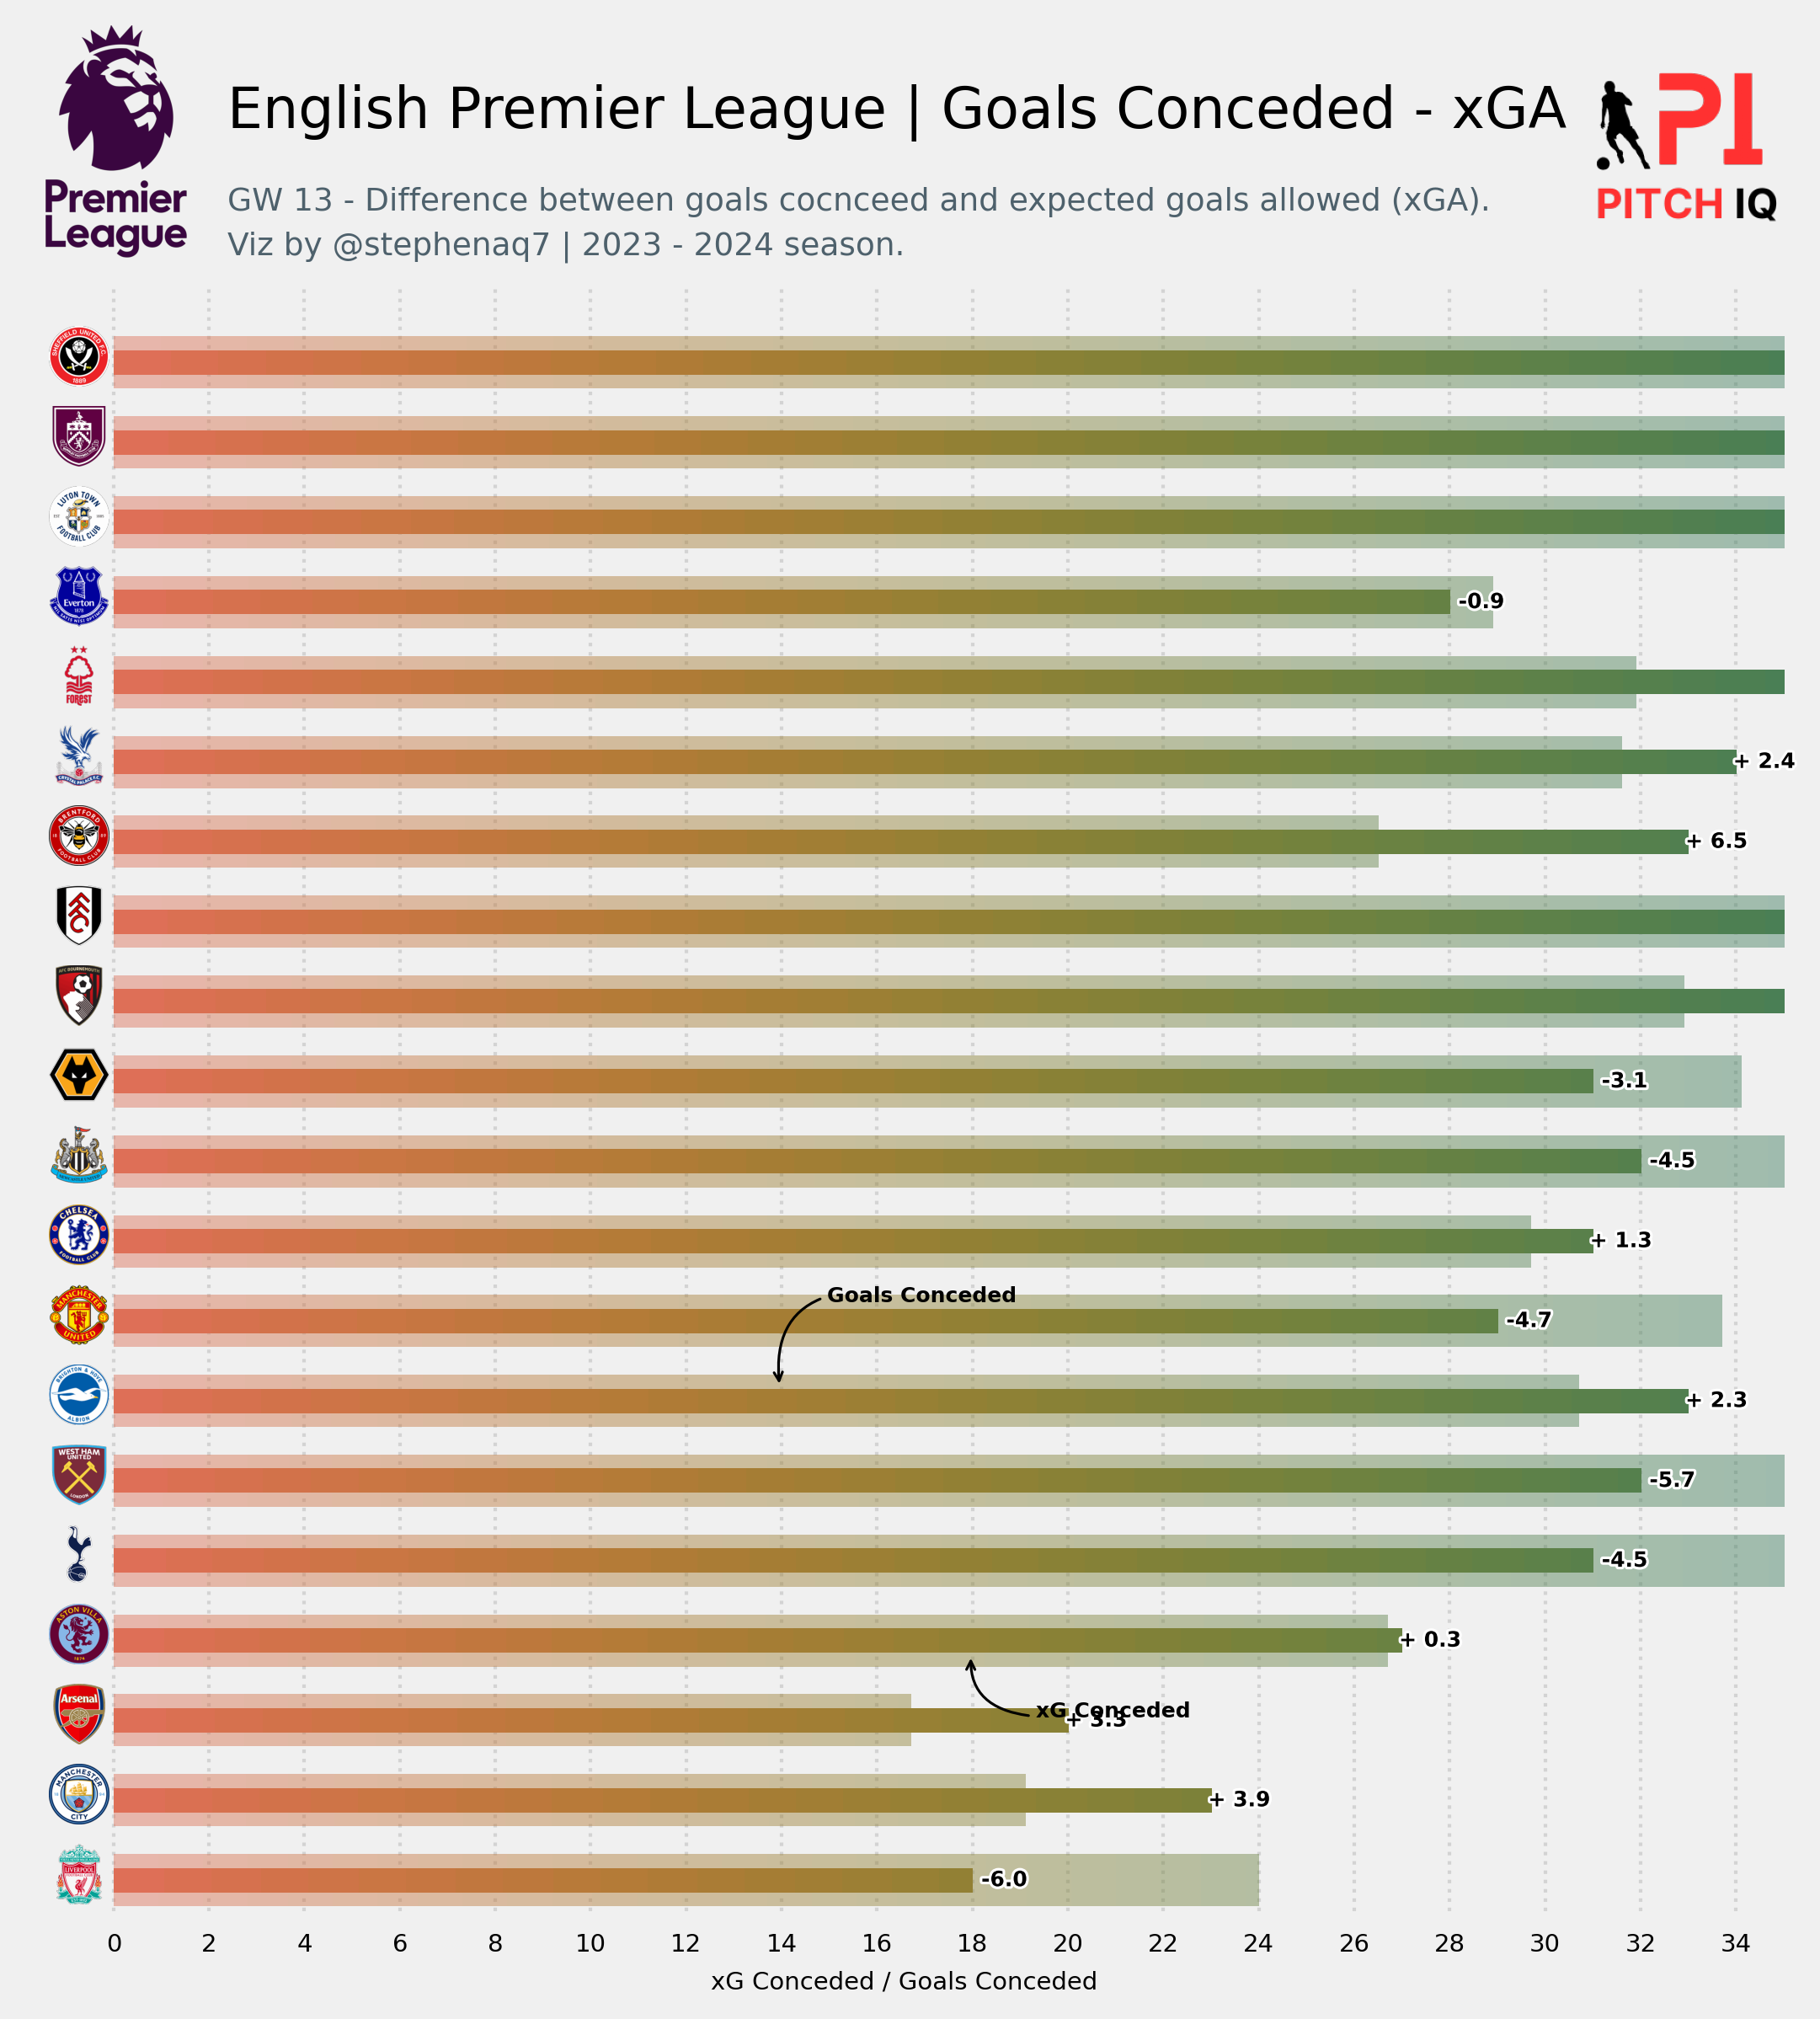

In [23]:
fig = plt.figure(figsize=(8, 8), dpi=300)
ax = plt.subplot(111)

ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_label_text('xG Conceded / Goals Conceded', size=7)
ax.tick_params(labelsize=7)
ax.grid(axis='x', color='lightgrey', ls=':')

# xG
bars_ = ax.barh(df.index, df['xg_against'], height=0.65)
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x, y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0, 1 * w / max(df['xg_for']), 256))
    ax.imshow(
        grad, extent=[x, x + w, y, y + h],
        aspect='auto', zorder=3,
        norm=NoNorm(vmin=0, vmax=1), cmap='SOC', alpha=0.45
    )

# xGOT
bars_ = ax.barh(df.index, df['goals_against'], height=0.3)
lim = ax.get_xlim() + ax.get_ylim()
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x, y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0, 1 * w / max(df['goals_against']), 256))
    ax.imshow(
        grad, extent=[x, x + w, y, y + h],
        aspect='auto', zorder=3,
        norm=NoNorm(vmin=0, vmax=1), cmap='SOC'
    )

ax.set_xlim(-1.85, 35)  # Adjusted to accommodate 19 bars
ax.set_ylim(-0.5, 20)  # Adjusted to accommodate 19 bars

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for y in df.index:
    ax_coords = DC_to_NFC((-1.35, y - 0.3))  # Adjusted to prevent overlap
    team_id = df['team_id'].iloc[y]
    team = df['team'].iloc[y].replace(' ', '\n')
    diff_xg = df['diff_conc'].iloc[y]
    xGOT = df['goals_against'].iloc[y]
    if diff_xg > 0:
        text_sign = '+'
    else:
        text_sign = ''
    ax_size = 0.03  # Adjusted size to prevent overlap
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    player_face = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id}.png"))
    image_ax.imshow(player_face)
    image_ax.axis('off')
    # ax.annotate(
    #     xy=(-1.1, y - 0.32),
    #     text=team,
    #     size=5,
    #     ha='center',
    #     va='center'
    # )
    text_ = ax.annotate(
        xy=(xGOT, y),
        xytext=(8, 0),
        text=f'{text_sign} {diff_xg:.1f}',
        size=6,
        ha='center',
        va='center',
        textcoords='offset points',
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
    )
text_ = ax.annotate(
    xy=(14, 6),
    xytext=(40,30),
    text='Goals Conceded',
    size=6,
    ha='center',
    va='center',
    textcoords='offset points',
    weight='bold',
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="black", linewidth=0.75,
            connectionstyle="angle3,angleA=-10,angleB=100"
    )
)

text_ = ax.annotate(
    xy=(18, 3),
    xytext=(40,-20),
    text='xG Conceded',
    size=6,
    ha='center',
    va='center',
    textcoords='offset points',
    weight='bold',
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="black", linewidth=0.75,
            connectionstyle="angle3,angleA=10,angleB=-100"
    )
)
fig_text(
    x=0.18, y=0.95,
    s="English Premier League | Goals Conceded - xGA",
    va='bottom', ha='left',
    fontsize=16, color='black', font='Karla', 
)
fig_text(
    x=0.18, y=0.89,
    s="GW 13 - Difference between goals cocnceed and expected goals allowed (xGA).\nViz by @stephenaq7 | 2023 - 2024 season.",
    va='bottom', ha='left',
    fontsize=9, color='#4E616C', font='Karla'
)

ax2 = fig.add_axes([0.09, 0.075, 0.07, 1.75])
ax2.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
ax2.imshow(img)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.85, 0.075, 0.1, 1.75])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)


plt.show()  # Added this line to display the plot


In [24]:
fm_ids

,team,team_id
0,Sheffield Utd,8657
1,Luton Town,8346
2,Burnley,8191
3,Fulham,9879
4,West Ham,8654
5,Nott'ham Forest,10203
6,Crystal Palace,9826
7,Wolves,8602
8,Bournemouth,8678
9,Manchester Utd,10260


In [25]:
url = 'https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures'
page =requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(html_content)
# df[-1].columns = df[-1].columns.droplevel(0) # drop top header row
fixtures = df[0]

In [26]:
fixtures.dropna(subset=['Referee'], inplace=True)

In [27]:
fixtures['match_id'] = range(1, len(fixtures) + 1)

In [28]:
fixtures

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes,match_id
0,1.0,Fri,2023-08-11,20:00,Burnley,0.3,0–3,1.9,Manchester City,21572.0,Turf Moor,Craig Pawson,Match Report,NaN,1
1,1.0,Sat,2023-08-12,12:30,Arsenal,0.8,2–1,1.2,Nott'ham Forest,59984.0,Emirates Stadium,Michael Oliver,Match Report,NaN,2
2,1.0,Sat,2023-08-12,15:00,Everton,2.7,0–1,1.5,Fulham,39940.0,Goodison Park,Stuart Attwell,Match Report,NaN,3
3,1.0,Sat,2023-08-12,15:00,Sheffield Utd,0.5,0–1,1.9,Crystal Palace,31194.0,Bramall Lane,John Brooks,Match Report,NaN,4
4,1.0,Sat,2023-08-12,15:00,Brighton,4.0,4–1,1.5,Luton Town,31872.0,The American Express Community Stadium,David Coote,Match Report,NaN,5
5,1.0,Sat,2023-08-12,15:00,Bournemouth,1.3,1–1,1.1,West Ham,11245.0,Vitality Stadium,Peter Bankes,Match Report,NaN,6
6,1.0,Sat,2023-08-12,17:30,Newcastle Utd,3.3,5–1,1.8,Aston Villa,52207.0,St James' Park,Andy Madley,Match Report,NaN,7
7,1.0,Sun,2023-08-13,14:00,Brentford,2.2,2–2,1.3,Tottenham,17066.0,Gtech Community Stadium,Robert Jones,Match Report,NaN,8
8,1.0,Sun,2023-08-13,16:30,Chelsea,1.4,1–1,1.3,Liverpool,40096.0,Stamford Bridge,Anthony Taylor,Match Report,NaN,9
9,1.0,Mon,2023-08-14,20:00,Manchester Utd,2.2,1–0,2.2,Wolves,73358.0,Old Trafford,Simon Hooper,Match Report,NaN,10


In [48]:
A_fixtures = fixtures.copy()
H_fixtures = fixtures.copy()

A_fixtures['Venue'] = A_fixtures.apply(lambda row: 'A' if row['Away'] == row['Venue'] else 'H', axis=1)

# Create a new column 'team_name' based on 'Home' and 'Away' columns
A_fixtures['team'] = A_fixtures.apply(lambda row: row['Home'] if row['Venue'] == 'H' else row['Away'], axis=1)

# Reshape the DataFrame based on 'match_id'
A_melted_df = A_fixtures.melt(id_vars=['match_id', 'Venue', 'team'], value_vars=['xG', 'xG.1'], 
                    var_name='variable', value_name='value')

# Rename the columns as needed
A_melted_df.rename(columns={'Venue': 'venue_code'}, inplace=True)

A_melted_df['variable'] = A_melted_df['variable'].replace({'xG':'xG_ag', 'xG.1': 'xG_for' })


A_Final_df = A_melted_df.merge(fm_ids, on='team', how='left')

A_Final_df.rename(columns={'team': 'team_name'}, inplace=True)

A_Final_df.rename(columns={'venue_code': 'venue'}, inplace=True)


H_fixtures['Venue'] = H_fixtures.apply(lambda row: 'H' if row['Home'] == row['Venue'] else 'A', axis=1)

# Create a new column 'team_name' based on 'Home' and 'Away' columns
H_fixtures['team'] = H_fixtures.apply(lambda row: row['Home'] if row['Venue'] == 'H' else row['Away'], axis=1)

# Reshape the DataFrame based on 'match_id'
H_melted_df = H_fixtures.melt(id_vars=['match_id', 'Venue', 'team'], value_vars=['xG', 'xG.1'], 
                    var_name='variable', value_name='value')

# Rename the columns as needed
H_melted_df.rename(columns={'Venue': 'venue_code'}, inplace=True)

H_melted_df['variable'] = H_melted_df['variable'].replace({'xG':'xG_ag', 'xG.1': 'xG_for' })


H_Final_df = H_melted_df.merge(fm_ids, on='team', how='left')

H_Final_df.rename(columns={'team': 'team_name'}, inplace=True)

H_Final_df.rename(columns={'venue_code': 'venue'}, inplace=True)

df = pd.concat([A_Final_df, H_Final_df]).reset_index()


In [49]:
df

,index,match_id,venue,team_name,variable,value,team_id
0,0,1,H,Burnley,xG_ag,0.3,8191
1,1,2,H,Arsenal,xG_ag,0.8,9825
2,2,3,H,Everton,xG_ag,2.7,8668
3,3,4,H,Sheffield Utd,xG_ag,0.5,8657
4,4,5,H,Brighton,xG_ag,4.0,10204
5,5,6,H,Bournemouth,xG_ag,1.3,8678
6,6,7,H,Newcastle Utd,xG_ag,3.3,10261
7,7,8,H,Brentford,xG_ag,2.2,9937
8,8,9,H,Chelsea,xG_ag,1.4,8455
9,9,10,H,Manchester Utd,xG_ag,2.2,10260


In [50]:
top_10 = [
    8456, 10261, 8650, 9825, 8455,
    10252, 8586, 10204, 8654, 10260
]
top_10_colors=[
    '#ed2227', '#2a4b80', '#8c2d42', '#ac152a',
    '#7f1734', '#000000', '#faac28', '#000000',
    '#182544', '#00669d'
]

In [61]:
def plot_scatter_xg(ax, team_id, color='red', label_x=False, label_y=False):
    '''
    This function plots the scatter xG of all matches in the Premier League.
    '''
    ax.grid(ls='--', color='lightgrey')

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(True)  # Ensure bottom spine is visible
    ax.spines["left"].set_visible(True) 
    # ----------------------------------------------------------------
    # -- Filter data
    df_aux_h = df[(df['team_id'] == team_id) & (df['venue'] == 'H')]
    df_aux_a = df[(df['team_id'] == team_id) & (df['venue'] == 'A')]
    # ----------------------------------------------------------------
    # -- Scatter plots
    ax.scatter(
        df[df['variable'] == 'xG_ag']['value'], df[df['variable'] == 'xG_for']['value'], 
        alpha=.1, lw=1,
        zorder=3, s=20
    )
    ax.scatter(
        df_aux_h[df_aux_h['variable'] == 'xG_ag']['value'], df_aux_h[df_aux_h['variable'] == 'xG_for']['value'], 
        alpha=1, lw=1, ec='black', fc=color,
        zorder=3, s=40
    )
    ax.scatter(
        df_aux_a[df_aux_a['variable'] == 'xG_ag']['value'], df_aux_a[df_aux_a['variable'] == 'xG_for']['value'], 
        alpha=1, lw=1, ec=color, fc='white',
        zorder=3, s=40, hatch='///////'
    )
    # ----------------------------------------------------------------
    # -- Set limits and draw divider line.
    ax.set_xlim(-0.5,round(df['value'].max()+.8))
    ax.set_ylim(-0.5,round(df['value'].max()+.8))
    ax.plot(
        [0,ax.get_xlim()[1]], [0,ax.get_ylim()[1]], 
        ls='--', color='black', lw=1,
        zorder=2
    )
    # ----------------------------------------------------------------
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    # ----------------------------------------------------------------
    if label_x:
        ax.set_xlabel('xGA (xG conceded)',fontsize=10)
    if label_y:
        ax.set_ylabel('xGF (xG created)',fontsize=10)

    ax.tick_params(axis='both', which='major', labelsize=8) 
    return ax

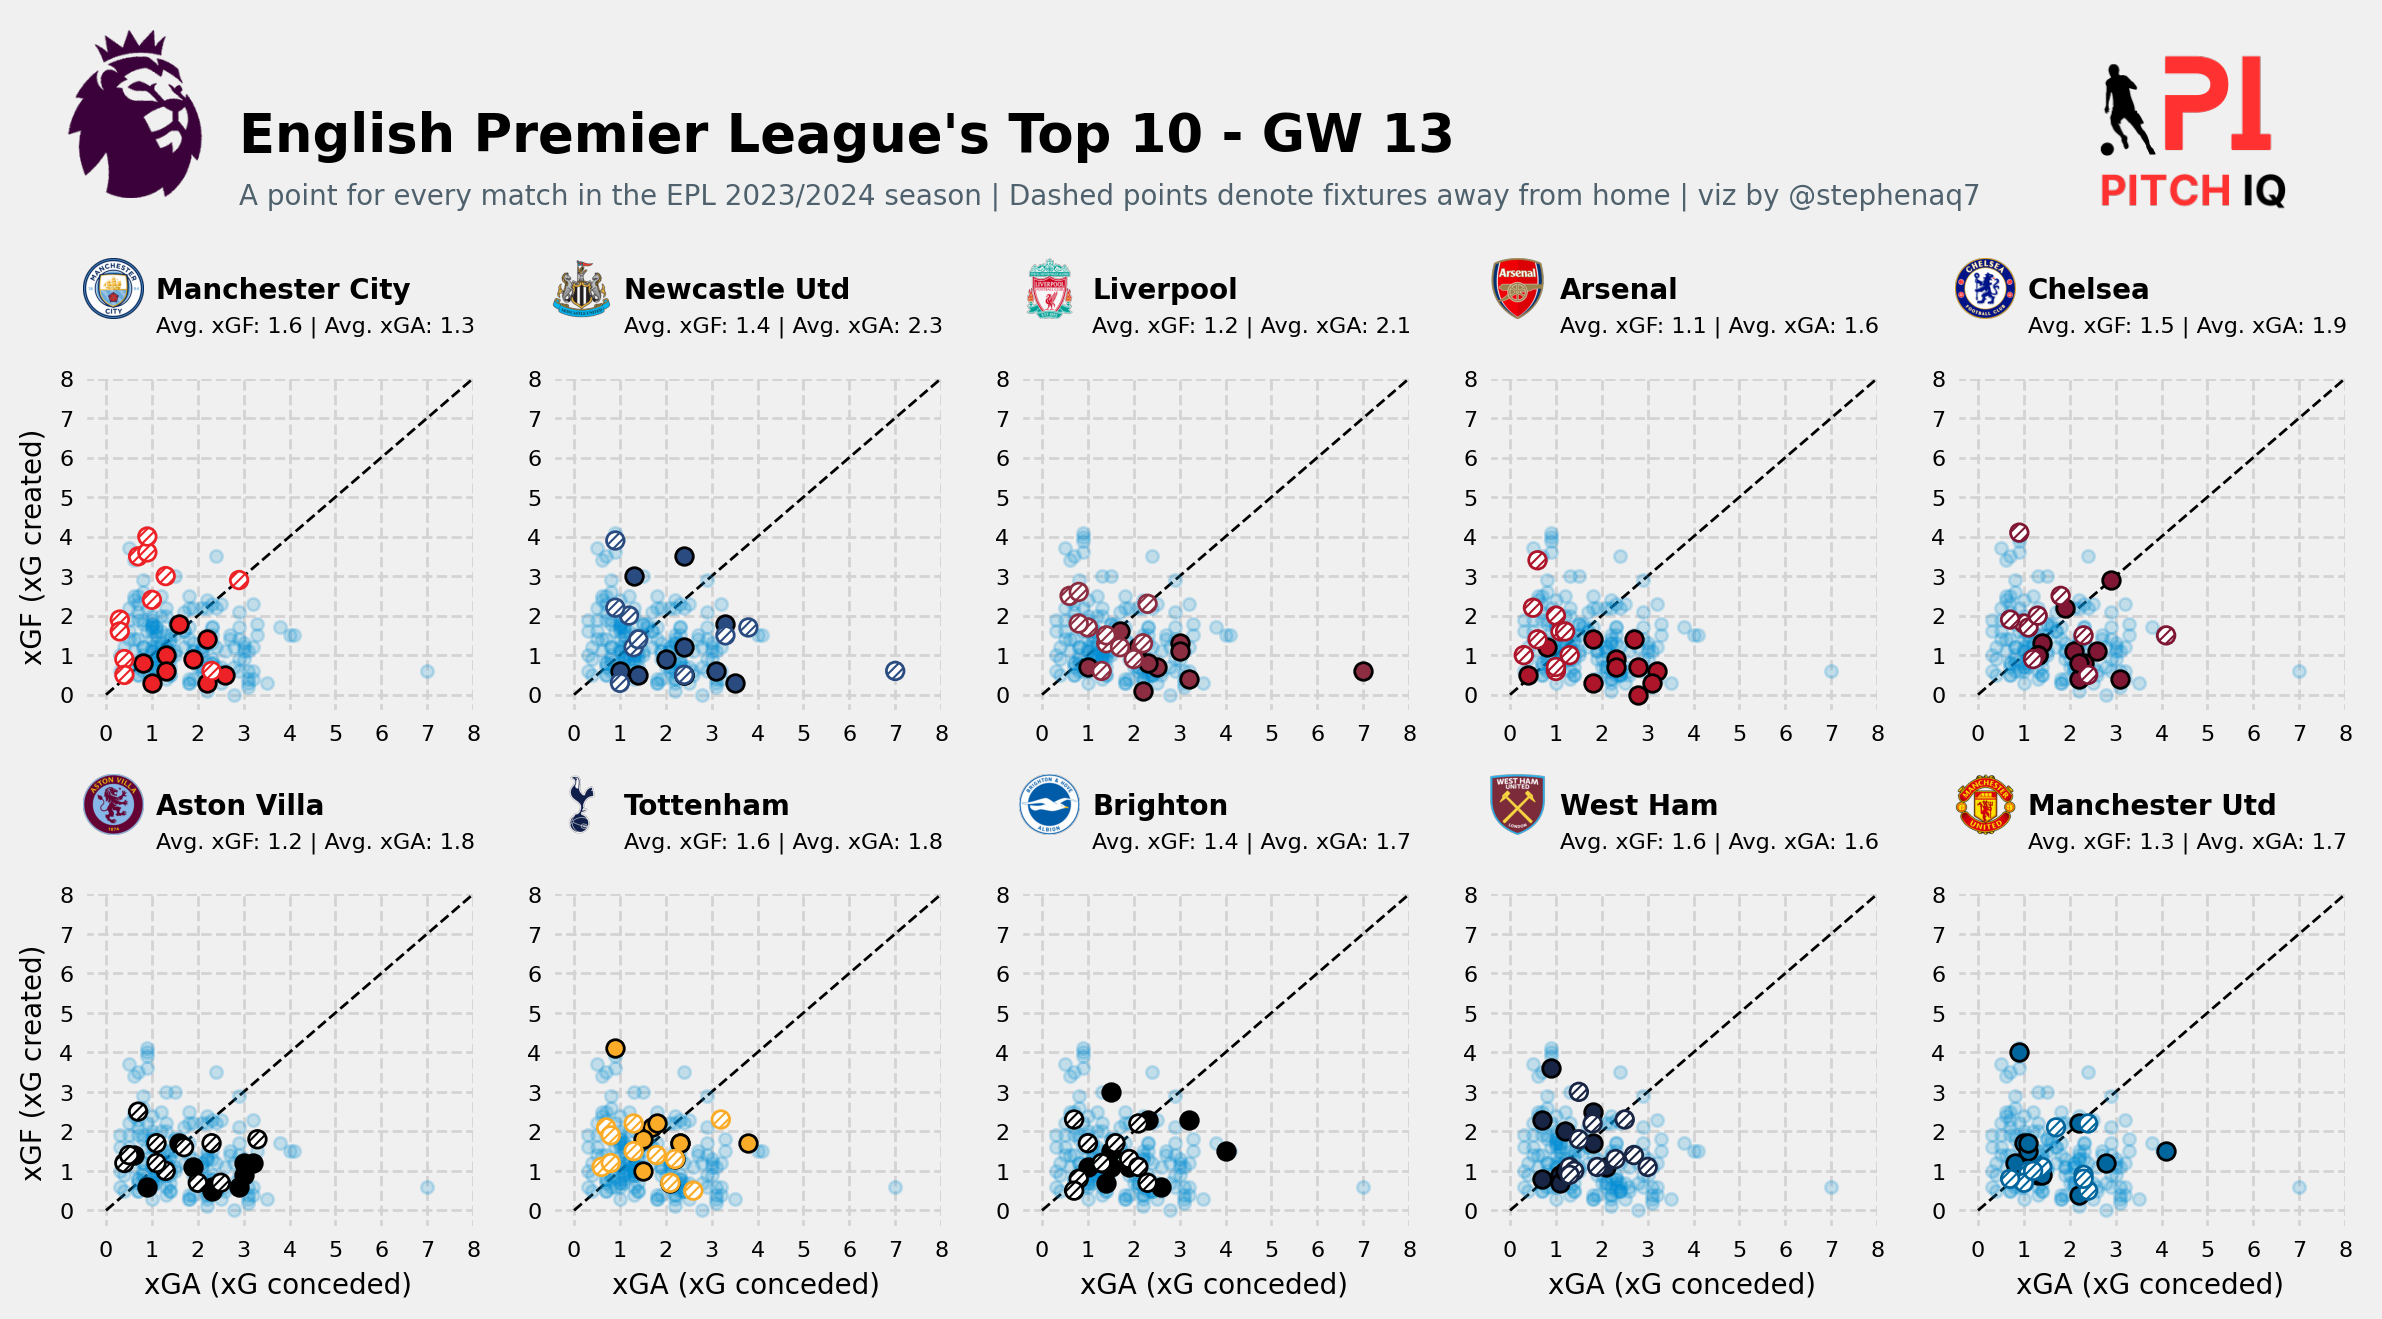

In [62]:
fig = plt.figure(figsize=(13, 6), dpi = 200)
nrows = 4
ncols = 5
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios = [(1/nrows)*2.35 if x % 2 != 0 else (1/nrows)/2.35 for x in range(nrows)], hspace = 0.3
)

plot_counter = 0
logo_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],
            )
            teamId = top_10[plot_counter]
            color = top_10_colors[plot_counter]

            if col == 0:
                label_y = True
            else:
                label_y = False
            if row == 3:
                label_x = True
            else:
                label_x = False
            
            plot_scatter_xg(ax, teamId, color, label_x, label_y)           
            plot_counter += 1
        else:
            teamId = top_10[logo_counter]
            teamName = df[df['team_id'] == teamId]['team_name'].iloc[0]
            avg_xG_for = df[(df['team_id'] == teamId) & (df['variable'] == 'xG_for')]['value'].mean()
            avg_xG_ag = df[(df['team_id'] == teamId) & (df['variable'] == 'xG_ag')]['value'].mean()
            fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = 'NW'
            )
            club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png'))
            logo_ax.imshow(club_icon)
            logo_ax.axis('off')
            # -- Add the team name
            ax_text(
                x = 1.2, 
                y = 0.7,
                s = f'<{teamName}>\n<Avg. xGF: {avg_xG_for:.1f} | Avg. xGA: {avg_xG_ag:.1f}>',
                ax = logo_ax, 
                highlight_textprops=[{'weight':'bold', 'font':'DM Sans'},{'size':'8'}],
                font = 'Karla', 
                ha = 'left', 
                size = 10, 
                annotationbbox_kw = {'xycoords':'axes fraction'}
            )

            logo_counter += 1

fig_text(
    x=0.14, y=.96, 
    s='English Premier League\'s Top 10 - GW 13 ',
    va='bottom', ha='left',
    fontsize=19, color='black', font='DM Sans', weight='bold'
)
fig_text(
	x=0.14, y=.92, 
    s='A point for every match in the EPL 2023/2024 season | Dashed points denote fixtures away from home | viz by @stephenaq7',
	va='bottom', ha='left',
	fontsize=10, color='#4E616C', font='Karla'
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
logo_ax = fig.add_axes(
    [.06, .93, .08, .14]
)
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{47:.0f}.png'))
logo_ax.imshow(club_icon)
logo_ax.axis('off')

### Add Stats by Steve logo
ax3 = fig.add_axes([0.85, 0.075, 0.08, 1.83])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)



In [34]:
url = 'https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures'
page =requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(html_content)
# df[-1].columns = df[-1].columns.droplevel(0) # drop top header row
fixtures_23_24 = df[0]

In [35]:
url = 'https://fbref.com/en/comps/9/2022-2023/schedule/2022-2023-Premier-League-Scores-and-Fixtures'
page =requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(html_content)
# df[-1].columns = df[-1].columns.droplevel(0) # drop top header row
fixtures_22_23 = df[0]

In [36]:
url = 'https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures'
page =requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(html_content)
# df[-1].columns = df[-1].columns.droplevel(0) # drop top header row
fixtures_21_22 = df[0]

In [37]:
multi_season = pd.concat([fixtures_23_24, fixtures_22_23, fixtures_21_22 ])

In [38]:

multi_season.dropna(subset=['Referee'], inplace=True)
multi_season['match_id'] = range(1, len(multi_season) + 1)
multi_season_away = multi_season[['Away','xG', 'Score', 'xG.1','match_id', 'Date']]
multi_season_away.rename(columns={'Away': 'team'}, inplace=True)
multi_season_away.rename(columns={'xG.1': 'xG_for'}, inplace=True)
multi_season_away.rename(columns={'xG': 'xG_ag'}, inplace=True)
multi_season_away['venue'] = 'A'
multi_season_away[['score_ag','score_for']] = multi_season['Score'].str.split('–', expand=True)
multi_season_home = multi_season[['Home','xG', 'Score', 'xG.1','match_id', 'Date']]
multi_season_home.rename(columns={'Home': 'team'}, inplace=True)
multi_season_home.rename(columns={'xG.1': 'xG_ag'}, inplace=True)
multi_season_home.rename(columns={'xG': 'xG_for'}, inplace=True)
multi_season_home['venue'] = 'H'
multi_season_home[['score_for','score_ag']] = multi_season['Score'].str.split('–', expand=True)

columns = multi_season_away.columns

multi_season_home = multi_season_home[columns]



/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [39]:
multi_season_expanded = pd.concat([multi_season_away, multi_season_home])

multi_melted_df = multi_season_expanded.melt(id_vars=['match_id','Date', 'venue', 'team'], value_vars=['score_for', 'score_ag', 'xG_for', 'xG_ag',], 
                    var_name='variable', value_name='value')

Final_df = multi_melted_df.merge(fm_ids, on='team', how='left')

Final_df.rename(columns={'team': 'team_name'}, inplace=True)

Final_df.rename(columns={'Date': 'date'}, inplace=True)


df = Final_df


In [40]:
def get_xG_rolling_data(team_id, window=10, data=df):
    '''
    This function returns xG rolling average figures for a specific team.
    '''
    df = data.copy()
    df_xg = df[(df['team_id'] == team_id) & (df['variable'].isin(['xG_for', 'xG_ag']))]
    df_xg = pd.pivot_table(df_xg,
            index=['date', 'match_id', 'team_id', 'team_name'],columns='variable', values='value', aggfunc= 'first'
        ).reset_index().rename_axis(None, 1)
    
    df_xg.columns = ['date', 'match_id', 'team_id', 'team_name', 'xG_ag', 'xG_for']
    df_xg['rolling_xG_for'] = df_xg['xG_for'].rolling(window=window, min_periods=0).mean()
    df_xg['rolling_xG_ag'] = df_xg['xG_ag'].rolling(window=window, min_periods=0).mean()
    df_xg['rolling_diff'] = df_xg['rolling_xG_for'] - df_xg['rolling_xG_ag']
    return df_xg

In [41]:
get_xG_rolling_data(8654)

,date,match_id,team_id,team_name,xG_ag,xG_for,rolling_xG_for,rolling_xG_ag,rolling_diff
0,2021-08-15,519,8654.0,West Ham,1.8,2.7,2.700000,1.800000,0.900000
1,2021-08-23,530,8654.0,West Ham,0.6,2.3,2.500000,1.200000,1.300000
2,2021-08-28,533,8654.0,West Ham,1.1,1.3,2.100000,1.166667,0.933333
3,2021-09-11,547,8654.0,West Ham,0.7,0.7,1.750000,1.050000,0.700000
4,2021-09-19,558,8654.0,West Ham,2.0,1.6,1.720000,1.240000,0.480000
5,2021-09-25,564,8654.0,West Ham,1.2,1.6,1.700000,1.233333,0.466667
6,2021-10-03,579,8654.0,West Ham,1.2,1.5,1.671429,1.228571,0.442857
7,2021-10-17,588,8654.0,West Ham,0.9,1.2,1.612500,1.187500,0.425000
8,2021-10-24,598,8654.0,West Ham,0.7,1.3,1.577778,1.133333,0.444444
9,2021-10-31,609,8654.0,West Ham,0.7,2.3,1.650000,1.090000,0.560000


In [42]:
def get_xG_interpolated_df(team_id, window=10, data=df):
    # --- Get the xG rolling df
    df_xG = get_xG_rolling_data(team_id, window, data)
    # -- Create interpolated series
    df_xG['match_number'] = df_xG.index
    X_aux = df_xG.match_number.copy()
    X_aux.index = X_aux * 10 # 9 aux points in between each match
    last_idx = X_aux.index[-1] + 1
    X_aux = X_aux.reindex(range(last_idx))
    X_aux = X_aux.interpolate()
    # --- Aux series for the xG created (Y_for)
    Y_for_aux = df_xG.rolling_xG_for.copy()
    Y_for_aux.index = Y_for_aux.index * 10
    last_idx = Y_for_aux.index[-1] + 1
    Y_for_aux = Y_for_aux.reindex(range(last_idx))
    Y_for_aux = Y_for_aux.interpolate()
    # --- Aux series for the xG conceded (Y_ag)
    Y_ag_aux = df_xG.rolling_xG_ag.copy()
    Y_ag_aux.index = Y_ag_aux.index * 10
    last_idx = Y_ag_aux.index[-1] + 1
    Y_ag_aux = Y_ag_aux.reindex(range(last_idx))
    Y_ag_aux = Y_ag_aux.interpolate()
    # --- Aux series for the rolling difference in xG
    Z_diff_aux = df_xG.rolling_diff.copy()
    Z_diff_aux.index = Z_diff_aux.index * 10
    last_idx = Z_diff_aux.index[-1] + 1
    Z_diff_aux = Z_diff_aux.reindex(range(last_idx))
    Z_diff_aux = Z_diff_aux.interpolate()
    # -- Create the aux dataframe
    df_aux = pd.DataFrame({
        'X': X_aux,
        'Y_for': Y_for_aux,
        'Y_ag': Y_ag_aux,
        'Z': Z_diff_aux
    })
    return df_aux

In [43]:
get_xG_interpolated_df(10260)

,X,Y_for,Y_ag,Z
match_number,,,,
0,0.0,1.500,0.5000,1.0000
1,0.1,1.515,0.5100,1.0050
2,0.2,1.530,0.5200,1.0100
3,0.3,1.545,0.5300,1.0150
4,0.4,1.560,0.5400,1.0200
5,0.5,1.575,0.5500,1.0250
6,0.6,1.590,0.5600,1.0300
7,0.7,1.605,0.5700,1.0350
8,0.8,1.620,0.5800,1.0400


In [44]:
fm_ids

,team,team_id
0,Sheffield Utd,8657
1,Luton Town,8346
2,Burnley,8191
3,Bournemouth,8678
4,Fulham,9879
5,Nott'ham Forest,10203
6,West Ham,8654
7,Wolves,8602
8,Crystal Palace,9826
9,Manchester Utd,10260


In [45]:
big_six_cm = {
    '8456': {
        'low': '#00285e',
        'high': '#97c1e7'
    },
    
    '9825': {
        'low':'#063672',
        'high':'#db0007'
    },
    '8650': {
        'low': '#00B2A9',
        'high': '#C8102E'
    },
    '8455': {
        'low': '#d1d3d4',
        'high': '#034694'
    },
    '8586': {
        'low': '#0e9ca5',
        'high': '#132257'
    },
    
    '10260':{
        'low':'#DBA111',
        'high':'#da020e'
    },
    '10261':{
        'low':'#2dafe5',
        'high':'#7c2c3b'
    },
    '10252':{
        'low':'#fdbe11',
        'high':'#0053a0'
    },
    '10204':{
        'low':'#d1d3d4',
        'high':'#005daa'
    },
}

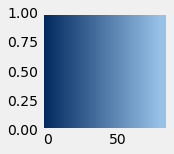

In [46]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mcolors.to_rgb(c1))
    c2=np.array(mcolors.to_rgb(c2))
    return mcolors.to_hex((1-mix)*c1 + mix*c2)

# Example with Liverpool
c1=big_six_cm['8456']['low']
c2=big_six_cm['8456']['high']
n=83

fig, ax = plt.subplots(figsize=(2, 2))
for x in range(n+1):
    ax.axvline(x, color=colorFader(c1,c2,x/n), linewidth=10) 


In [47]:
def plot_xG_gradient(ax, team_id, window=10, data=df):
    # -- Get the data
    df_xg = get_xG_rolling_data(team_id, window, data)
    df_aux_xg = get_xG_interpolated_df(team_id, window, data)
    # Specify the axes limits
    ax.set_ylim(0,3)
    ax.set_xlim(-0.5,df_xg.shape[0])
    ax.grid(ls='--', color='lightgrey')
    # -- Select the colors
    color_1 = big_six_cm[str(team_id)]['low']
    color_2 = big_six_cm[str(team_id)]['high']

    ax.plot(df_xg.index, df_xg['rolling_xG_for'], color=color_2,zorder=4)
    ax.plot(df_xg.index, df_xg['rolling_xG_ag'], color=color_1,zorder=4)
    ax.fill_between(x=[-0.5,window], y1=ax.get_ylim()[0], y2=ax.get_ylim()[1], alpha=0.15, color='black', ec='None',zorder=2)
    vmin = df_xg['rolling_diff'].min()
    vmax = df_xg['rolling_diff'].max()
    vmax = max(abs(vmin), abs(vmax))
    vmin = -1*vmax
    for i in range(0, len(df_aux_xg['X']) - 1):
        ax.fill_between(
            [df_aux_xg['X'].iloc[i], df_aux_xg['X'].iloc[i+1]],
            [df_aux_xg['Y_for'].iloc[i], df_aux_xg['Y_for'].iloc[i + 1]],
            [df_aux_xg['Y_ag'].iloc[i], df_aux_xg['Y_ag'].iloc[i + 1]],
            color=colorFader(color_1, color_2, mix=((df_aux_xg['Z'].iloc[i] - vmin)/(vmax - vmin))),
            zorder=3, alpha=0.3
        )
    for x in [38, 38*2]:
        ax.plot([x,x],[ax.get_ylim()[0], ax.get_ylim()[1]], color='black', alpha=0.35, zorder=2, ls='dashdot', lw=0.95)

    for x in [22, 60]:
        if x == 22:
            text = '21/22 season'
        else:
            text = '22/23 season'
        text_ = ax.annotate(
            xy=(x,2.75),
            text=text,
            color='black',
            size=7,
            va='center',
            ha='center',
            weight='bold',
            zorder=4
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
        )
    ax.tick_params(axis='both', which='major', labelsize=7) 
    return ax

<AxesSubplot:>

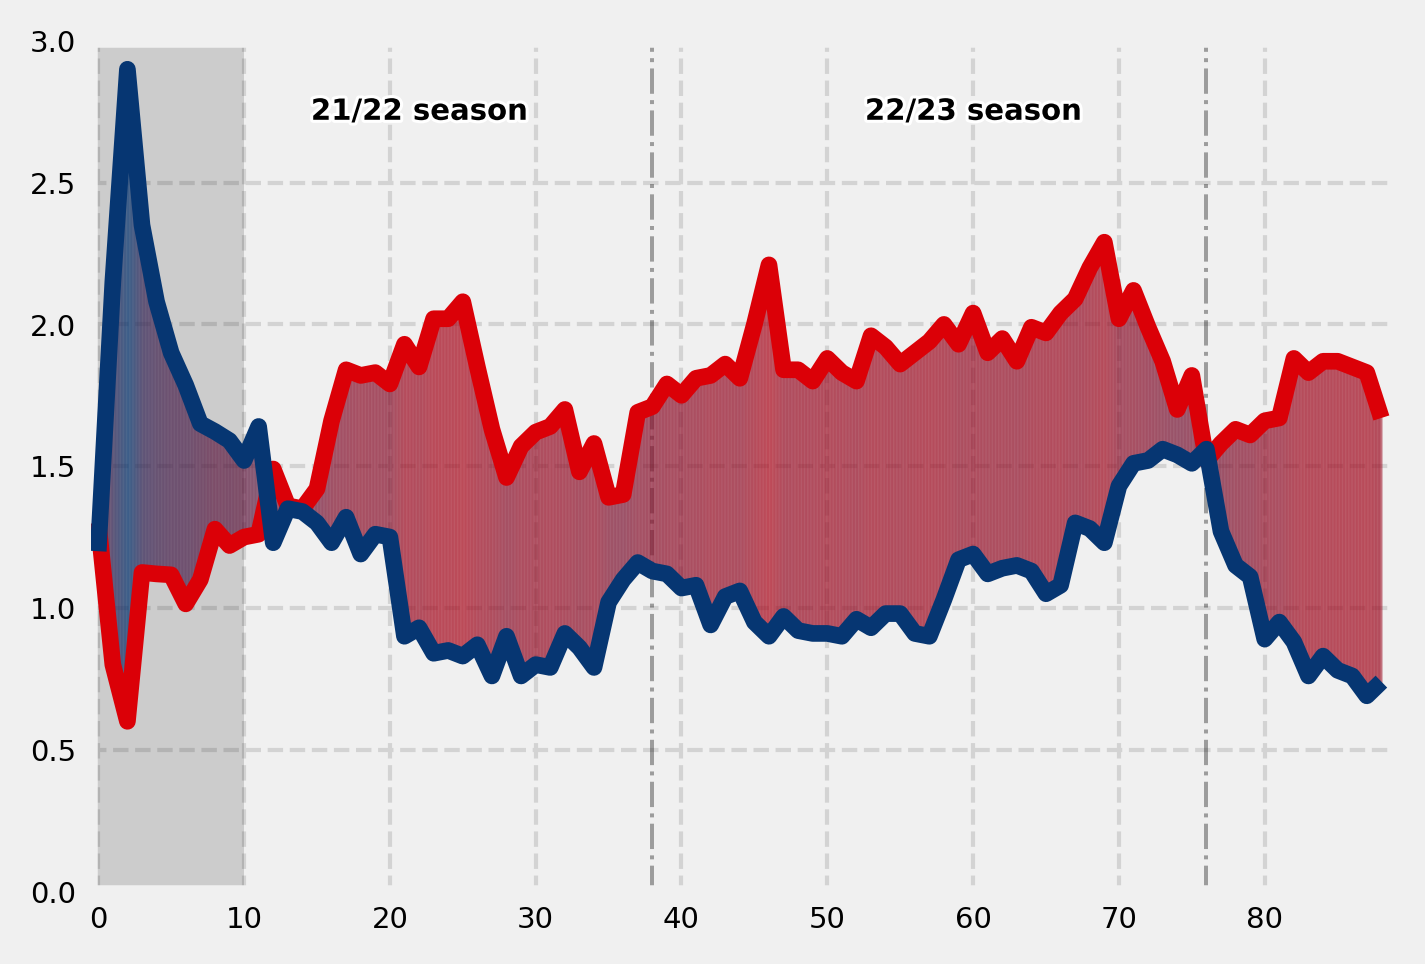

In [48]:
fig = plt.figure(figsize=(5,3.5), dpi=300)
ax = plt.subplot(111)

plot_xG_gradient(ax, 9825, 10)

In [49]:
list(big_six_cm.keys())

['8456', '9825', '8650', '8455', '8586', '10260', '10261', '10252', '10204']

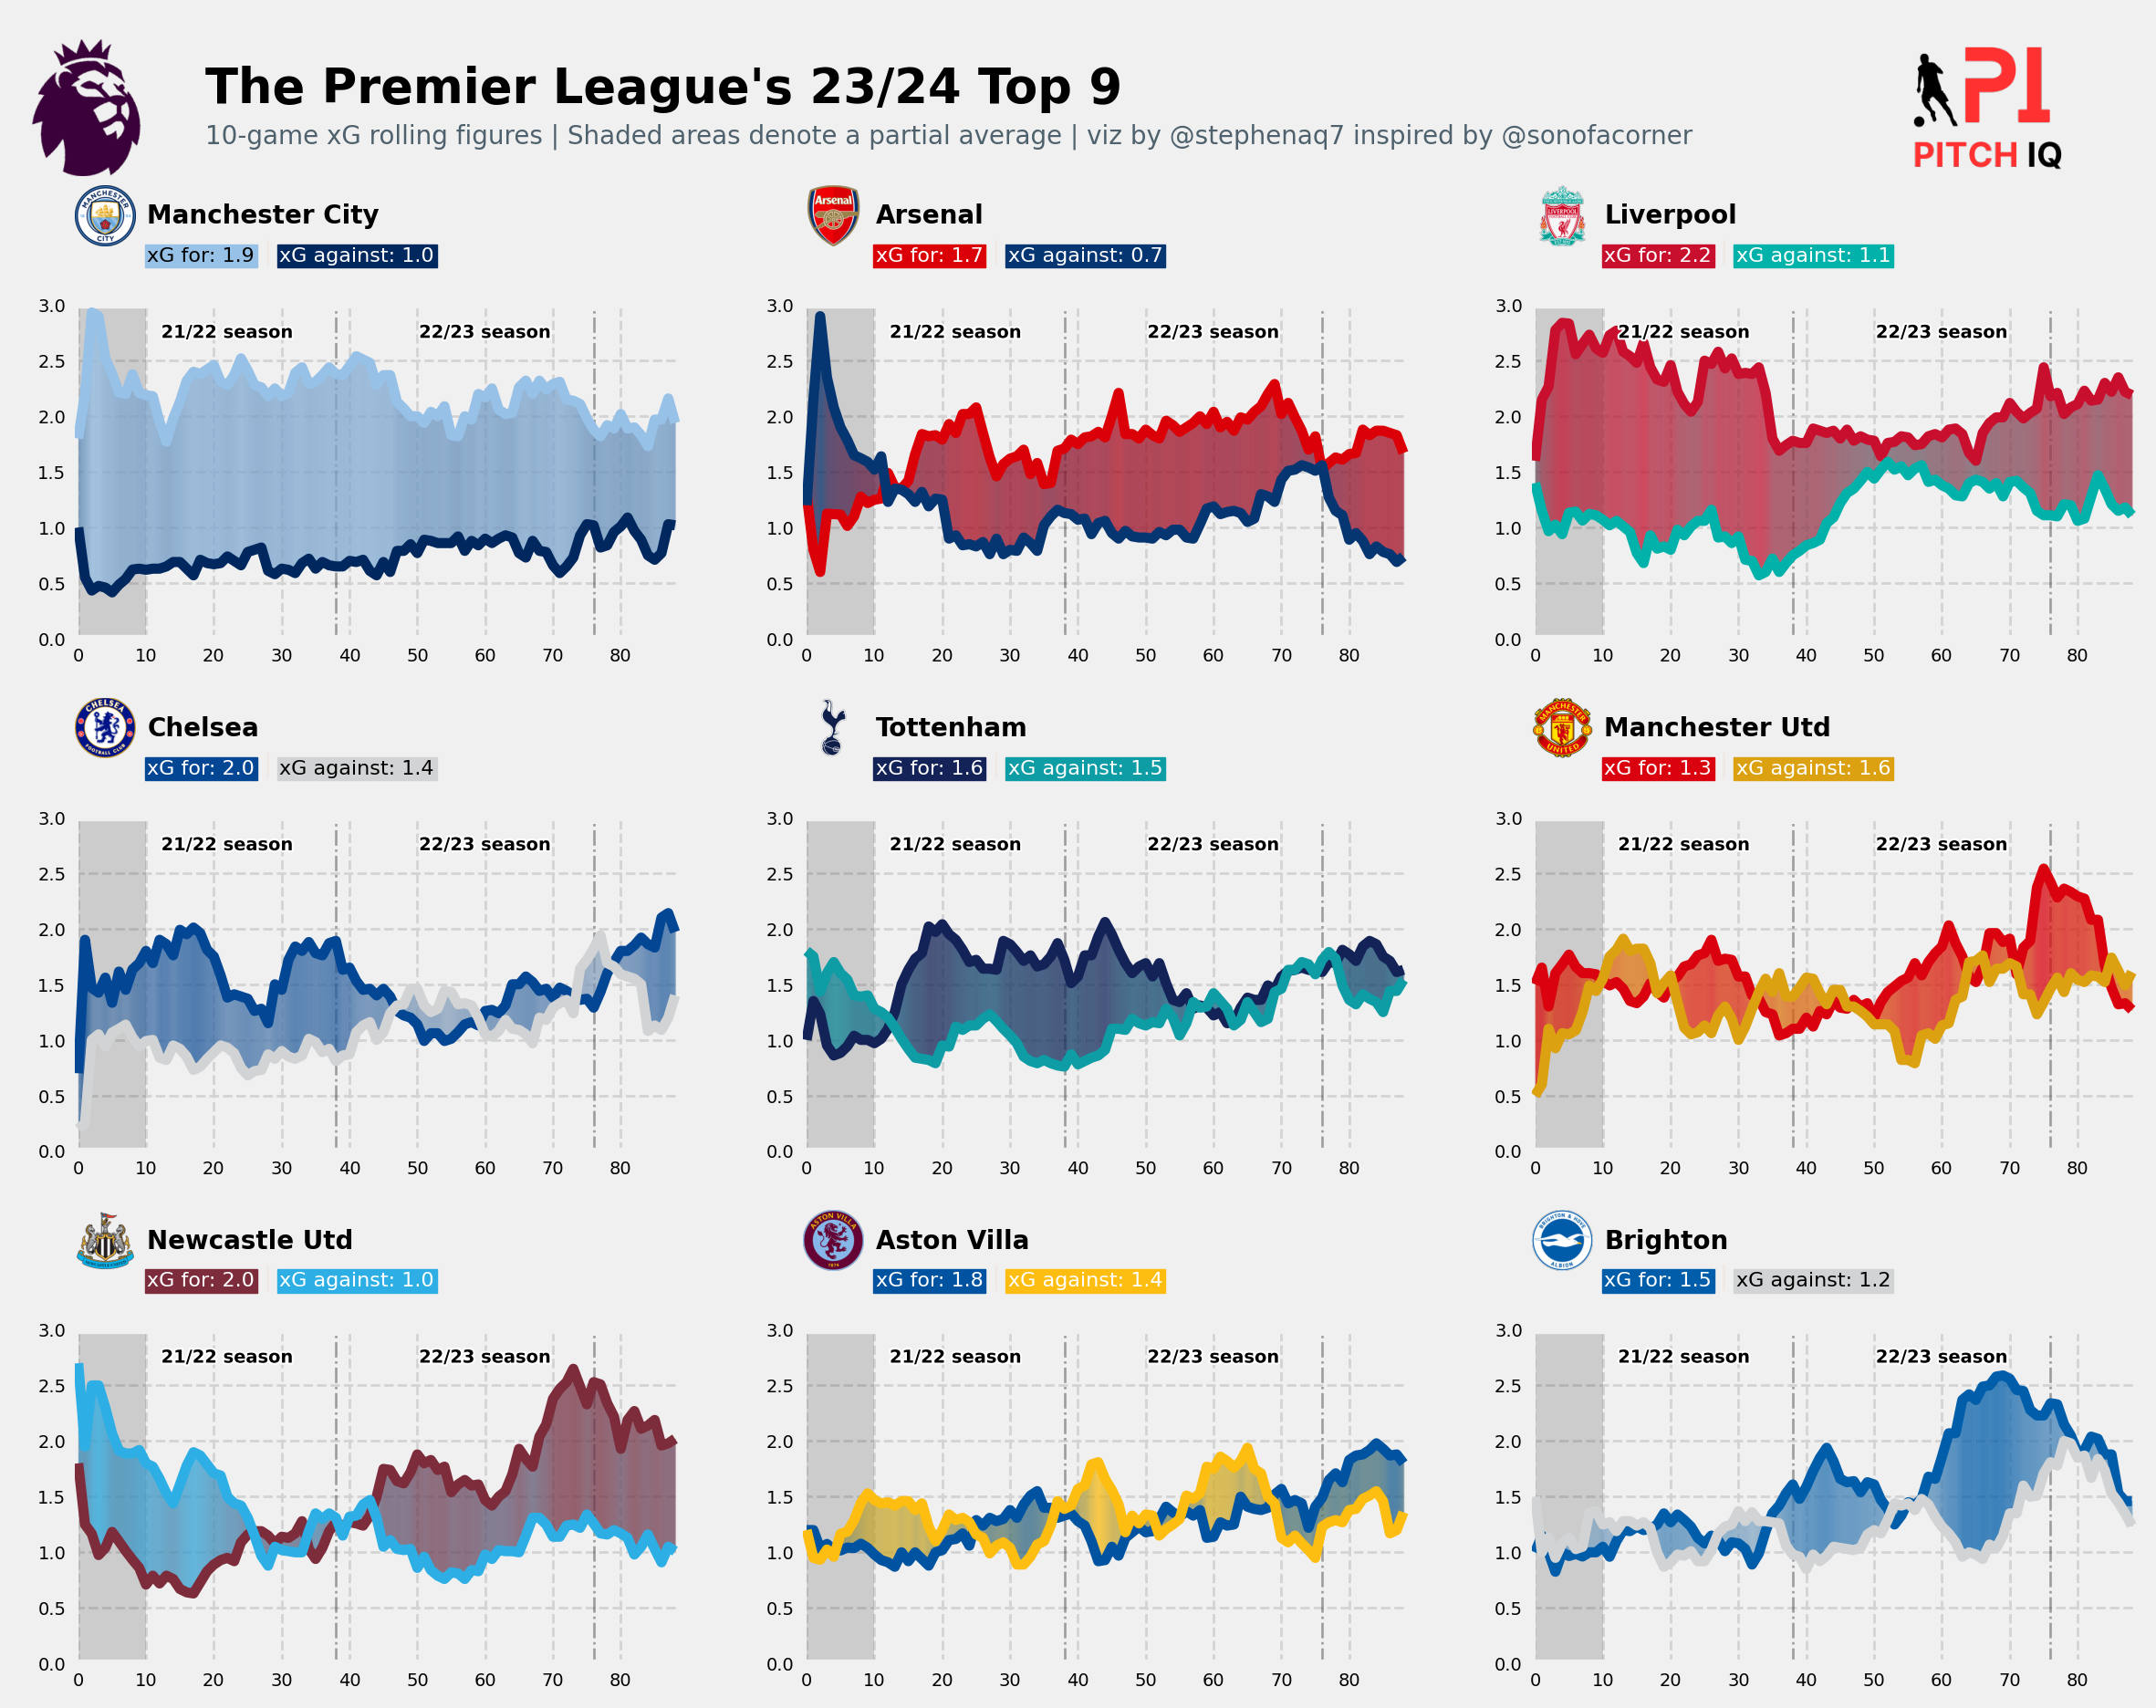

In [50]:
# ---- for path effects
def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]
pe = path_effect_stroke(linewidth=1.5, foreground="black")
# ----
fig = plt.figure(figsize=(13, 10), dpi = 200)
nrows = 6
ncols = 3
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios=[(1/nrows)*2.35 if x % 2 != 0 else (1/nrows)/2.35 for x in range(nrows)], hspace=0.3
)

plot_counter = 0
logo_counter = 0

for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],

            )
            teamId = list(big_six_cm.keys())[plot_counter]
            teamId = int(teamId)
            plot_xG_gradient(ax, teamId, 10)           
            plot_counter += 1
        else:
            teamId = list(big_six_cm.keys())[logo_counter]
            color_1 = big_six_cm[str(teamId)]['low']
            color_2 = big_six_cm[str(teamId)]['high']
            # -- This was done manually cuz I'm lazy...
            if color_1 == '#d1d3d4':
                color_1_t = 'black'
            else:
                color_1_t = 'white'
            if color_2 == '#97c1e7':
                color_2_t = 'black'
            else:
                color_2_t = 'white'
            teamId = int(teamId)
            df_for_text = get_xG_rolling_data(teamId, 10)
            teamName = df_for_text['team_name'].iloc[0]
            xG_for = df_for_text['rolling_xG_for'].iloc[-1]
            xG_ag = df_for_text['rolling_xG_ag'].iloc[-1]
            fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = 'NW', facecolor = '#EFE9E6'
            )
            club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png'))
            logo_ax.imshow(club_icon)
            logo_ax.axis('off')
            # -- Add the team name
            ax_text(
                x = 1.2, 
                y = 0.7,
                s = f'<{teamName}>\n<xG for: {xG_for:.1f}> <|> <xG against: {xG_ag:.1f}>',
                ax = logo_ax, 
                highlight_textprops=[
                    {'weight':'bold', 'font':'DM Sans'},
                    {'size':'8', 'bbox': {'edgecolor': color_2, 'facecolor': color_2, 'pad': 1}, 'color': color_2_t}, 
                    {'color':'#EFE9E6'},
                    {'size':'8', 'bbox': {'edgecolor': color_1, 'facecolor': color_1, 'pad': 1}, 'color': color_1_t}
                ],
                font = 'Karla', 
                ha = 'left', 
                size = 10, 
                annotationbbox_kw = {'xycoords':'axes fraction'}
            )
            logo_counter += 1

fig_text(
    x=0.135, y=.92, 
    s='The Premier League\'s 23/24 Top 9',
    va='bottom', ha='left',
    fontsize=19, color='black', font='DM Sans', weight='bold'
)
fig_text(
	x=0.135, y=.9, 
    s='10-game xG rolling figures | Shaded areas denote a partial average | viz by @stephenaq7 inspired by @sonofacorner',
	va='bottom', ha='left',
	fontsize=10, color='#4E616C', font='Karla'
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
logo_ax = fig.add_axes(
    [.05, .885, .07, .075]
)
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{47:.0f}.png'))
logo_ax.imshow(club_icon)
logo_ax.axis('off')

### Add Stats by Steve logo
ax3 = fig.add_axes([0.85, 0.075, 0.07, 1.7])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)

